In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from sklearn.neighbors import  KernelDensity

In [2]:
df = pd.read_fwf('D:\Downloads\Clone\Data Visualization\Homework_sampledata1.txt', sep = '\s+')
df = df.set_index('2008')
df.columns = [date(2008,m,1).strftime('%b') for m in range(1,13)]
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,,,,,,,,,,,,
1,10.5,7.3,10.8,18.2,20.0,25.3,27.2,25.1,25.8,23.0,24.9,12.6
2,9.8,10.4,10.7,18.0,25.4,24.8,26.6,26.1,26.7,23.5,20.9,13.9
3,10.7,11.0,11.7,18.8,25.4,26.5,27.4,25.8,25.1,24.5,20.4,17.7
4,15.1,12.9,12.4,20.4,26.5,25.2,27.2,25.3,26.0,23.0,23.1,20.5
5,13.5,11.4,16.0,22.4,24.0,26.0,26.2,26.2,23.5,22.7,22.5,16.7
6,16.0,11.0,16.7,23.6,24.0,26.2,25.5,26.4,24.6,22.8,23.8,17.6
7,15.8,10.3,17.1,23.6,25.1,27.8,25.0,25.0,24.7,24.4,19.6,16.4
8,15.8,12.1,16.9,26.4,25.1,24.8,25.8,26.3,25.3,24.1,18.5,12.7
9,18.0,11.7,17.8,23.8,22.5,26.2,25.6,24.3,22.7,24.0,17.2,12.6


In [3]:
today = '2007-12-01'
for i in range(12):
    new_day = pd.to_datetime(today) + pd.DateOffset(months = 1)
    today = new_day
    print(new_day, df.iloc[0].values[i])

2008-01-01 00:00:00 10.5
2008-02-01 00:00:00 7.3
2008-03-01 00:00:00 10.8
2008-04-01 00:00:00 18.2
2008-05-01 00:00:00 20.0
2008-06-01 00:00:00 25.3
2008-07-01 00:00:00 27.2
2008-08-01 00:00:00 25.1
2008-09-01 00:00:00 25.8
2008-10-01 00:00:00 23.0
2008-11-01 00:00:00 24.9
2008-12-01 00:00:00 12.6


ConversionError: Failed to convert value(s) to axis units: ['Jan-01', 'Feb-01', 'Mar-01', 'Apr-01', 'May-01', 'Jun-01', 'Jul-01', 'Aug-01', 'Sep-01', 'Oct-01', 'Nov-01', 'Dec-01']

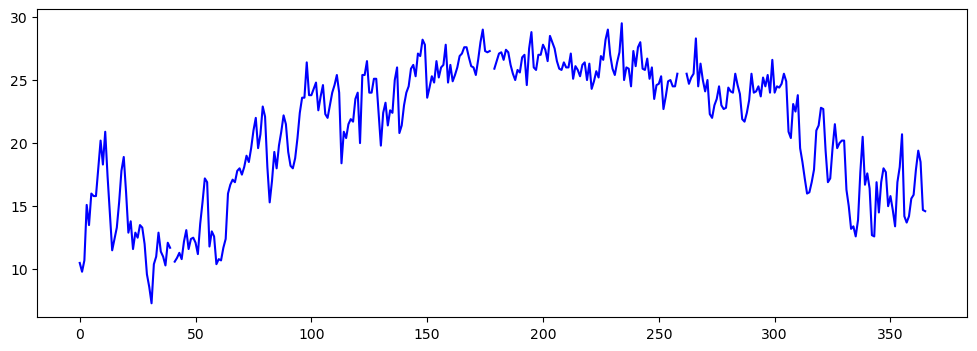

In [13]:
df = df.replace(-99.0, np.nan)

#list of all value
df_list = [df[i] for i in df.columns]

#delete last nan value of each month
new_list = []
for i in range(len(df_list)):
    l = df_list[i].tolist() 
    if (pd.isna(l[-1])):
        if (i==1) and (pd.isna(l[-2])):
            del l[-2:]
        else:
            del l[-1]
    new_list.append(l)

#flatten the list
flatten = [item for sublist in new_list for item in sublist]

#list of first day of each month
dates= pd.date_range('2008-01-01','2008-12-31' , freq='1M')-pd.offsets.MonthBegin(1)
dates = dates.strftime("%b-%d").tolist()

#plot
plt.figure(figsize = (12,4))
plt.plot(range(0,366),flatten, 'b-')
plt.xticks(dates)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Temp(oC)", fontsize = 12)
plt.grid(True)
plt.xlim(0,365)
plt.ylim(5,35)
plt.legend(["Temperature"])
plt.savefig("Figure1_1.png")
plt.show()

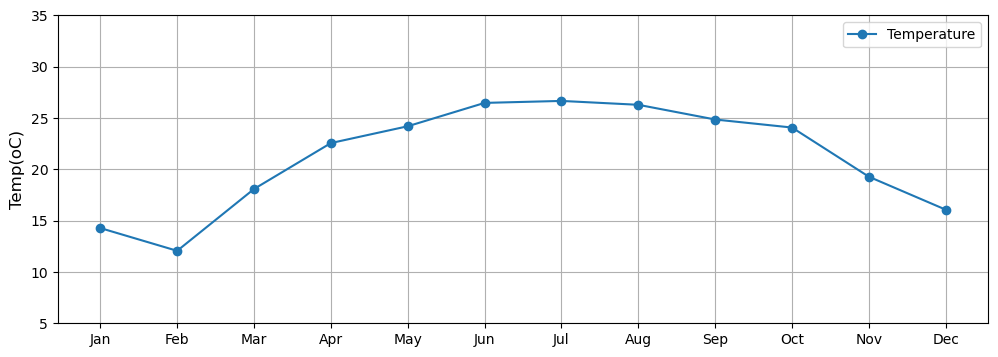

In [5]:
#cal
mean_data = [np.nanmean(df_list[i].tolist()) for i in range(len(df_list))]

#plot
plt.figure(figsize = (12,4))
plt.plot(df.columns, mean_data, 'o-')
plt.xticks(df.columns)
plt.ylabel("Temp(oC)", fontsize = 12)
plt.grid(True)
plt.ylim(5,35)
plt.legend(["Temperature"])
plt.savefig("Figure1_2.png")
plt.show()

In [9]:
df.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='2008')